In [1]:
import cv2
import os

import sys
sys.path.append("../project_functions/")
import ad_functions as adfns
import ad_crnn_functions as adcrn



In [2]:

def list_files_in_folder(folder_path):
    files = []
    
    for entry in os.scandir(folder_path):
        if entry.is_file():
            files.append(entry.path)
            
    return files



In [7]:
folder_path = "./s11_traindata/"
file_list = list_files_in_folder(folder_path)
print(len(file_list))


400000


In [8]:
print(file_list[0])

./s11_traindata/000s0XxW_6.png


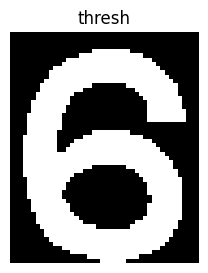

In [10]:
image = cv2.imread(file_list[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
adfns.show_img(thresh, 3, "thresh")

In [3]:




folder_path = "./s11_traindata/"
output_folder = './s11_mod_traindata/' 

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

file_list = list_files_in_folder(folder_path)

for file in file_list:
    # Read the image using cv2.imread
    image = cv2.imread(file)
    
    # Process the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Construct the output file path
    file_name = os.path.basename(file)
    output_path = os.path.join(output_folder, file_name)

    # Save the modified image
    cv2.imwrite(output_path, thresh)
